
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 2 -(EJERCICIO 3)

In [19]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn 
import matplotlib.patches as mpatches

seaborn.set_context('talk') # Esto afecta cosas como el tamaño de las etiquetas, las líneas y otros elementos del gráfico, pero no el estilo general. El contexto base es "notebook", y los otros contextos son "paper", "talk" y "poster", que son versiones de los parámetros del cuaderno escalados por .8, 1.3 y 1.6, respectivamente.

### **Lectura del dataset**

En la notebook 00 se explican los detalles de la siguiente sección.

In [20]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url) ##Leo archivo .csv (comma separated values) usando pandas. Y guardo todo en un dataframe. 

In [21]:
df[:5]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,Licenciatura en Sistemas,UNNE Universidad Nacional del Nordeste,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,SysAdmin / DevOps / SRE,"Docker, Linux, OpenStack, VMWare, Windows Server","Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","jQuery, WordPress","Microsoft SQL Server, MySQL",PHPUnit,"Eclipse, Visual Studio Code",GNU/Linux,Android,"Sí, pasiva",0.0,Bruto,Full-Time,130000.0,102000.0,NaN,3,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,Licenciatura en Ciencias dela Computación,UBA - Universidad de Buenos Aires,No,No,Sí,Developer,Amazon Web Services,"CSS, HTML, Javascript, SQL, TypeScript","Angular, Node.js","Amazon DynamoDB, MongoDB, MySQL",Jest,Vim,macOS,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,140000.0,106000.0,NaN,1,1,Menos de un sueldo,Performance individual,No,0.0,0,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


### Variables
Las variables a considerar en nuestra gráfica serán:
* Salario Mensual NETO
* Edad
* Genero

Aplicaremos un primer filtro a los datos, dado por la condicion Salrio Bruto > Salario NETO.


In [22]:
df_aux= df[df.salary_monthly_BRUTO > df.salary_monthly_NETO]

print('Número de filas POST "1º filtro:',len(df_aux.index))

print('Rango Edades', str(df_aux.profile_age.min()) + " - "+ str(df_aux.profile_age.max()))

Número de filas POST "1º filtro: 5460
Rango Edades 18 - 567


### Análisis de datos
Observamos que hay algunos outliers en las edades, por lo que restringiremos el rango de valores de la edad considerando individuos de 18 a 65 años.


In [23]:
df_aux= df_aux[(df_aux['profile_age']>17) & (df_aux['profile_age']<66) ]
print('Número de filas POST "2º filtro:',len(df_aux.index))

Número de filas POST "2º filtro: 5458


Vamos a eliminar los outliers de la variable salary_monthly_NETO recurriendo a los percentiles.

In [24]:
df_aux['salary_monthly_NETO'].quantile([.01, .02, .03, .04, .05, .95, .96, .97, .98, .99])

0.01        60.0000
0.02        90.3584
0.03      6426.0000
0.04     19182.0000
0.05     25000.0000
0.95    200000.0000
0.96    218880.0000
0.97    260000.0000
0.98    300000.0000
0.99    406450.0000
Name: salary_monthly_NETO, dtype: float64

Vamos a tomar los percentiles 5 y 98.

In [25]:
j = 5
percentile_05 = df_aux['salary_monthly_NETO'].quantile(j / 100)

k = 98
percentile_98 = df_aux['salary_monthly_NETO'].quantile(k / 100)


df_restricted_salary_age= df_aux[(df_aux['salary_monthly_NETO'] < percentile_98) & (df_aux['salary_monthly_NETO'] >= percentile_05)]

print('Número de filas POST 3º filtro:',len(df_restricted_salary_age.index))

Número de filas POST 3º filtro: 5064


In [26]:
df_restricted_salary_age[:5]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,Licenciatura en Sistemas,UNNE Universidad Nacional del Nordeste,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,SysAdmin / DevOps / SRE,"Docker, Linux, OpenStack, VMWare, Windows Server","Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","jQuery, WordPress","Microsoft SQL Server, MySQL",PHPUnit,"Eclipse, Visual Studio Code",GNU/Linux,Android,"Sí, pasiva",0.0,Bruto,Full-Time,130000.0,102000.0,NaN,3,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,Licenciatura en Ciencias dela Computación,UBA - Universidad de Buenos Aires,No,No,Sí,Developer,Amazon Web Services,"CSS, HTML, Javascript, SQL, TypeScript","Angular, Node.js","Amazon DynamoDB, MongoDB, MySQL",Jest,Vim,macOS,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,140000.0,106000.0,NaN,1,1,Menos de un sueldo,Performance individual,No,0.0,0,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


### Gráfico

Creamos un gráfico de barras para visualizar la diferencia de la media salarial entre hombres y mujeres por edades.

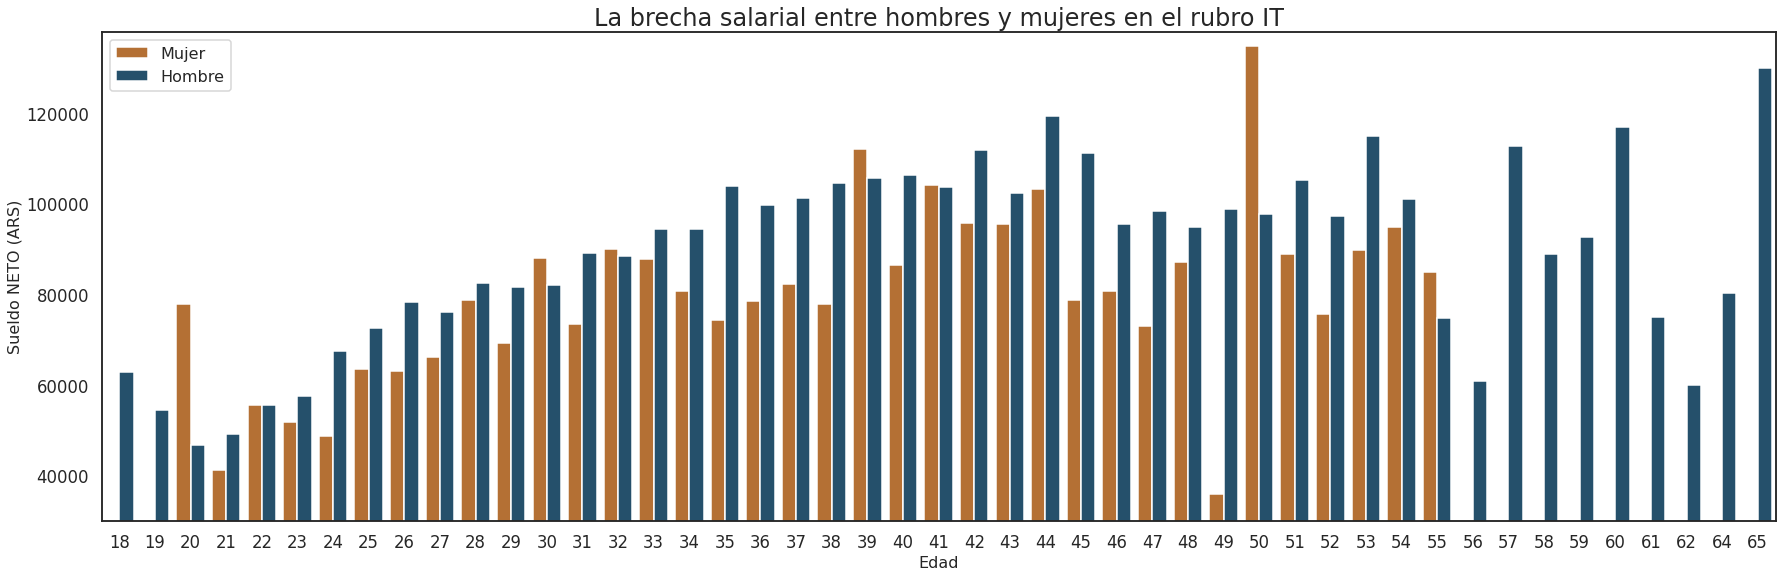

In [27]:
# set plot style: grey grid in the background:
#seaborn.set(style="darkgrid")
seaborn.set_style("white")
hue_order=['Mujer','Hombre']
# set the figure size
plt.figure(figsize=(30, 9))


#gráfico 

bar2 = seaborn.barplot(x="profile_age",  y="salary_monthly_NETO", data=df_restricted_salary_age, hue= df_restricted_salary_age['profile_gender'], hue_order=hue_order, palette=['#CA6F1E','#1A5276'],  ci=None)
# colors from https://htmlcolorcodes.com/es/

# add legend
bar2.legend( prop={'size': 16},loc='upper left')
plt.xlabel('Edad',fontdict= { 'fontsize': 16})
plt.ylabel('Sueldo NETO (ARS)',fontdict= { 'fontsize': 16})
plt.title('La brecha salarial entre hombres y mujeres en el rubro IT',fontdict= { 'fontsize': 24}, y =1.0)
plt.ylim(30000,138000)
plt.show()